In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

df_train = pd.read_csv("congressional_tweet_training_data.csv",names=None)


In [3]:
df_train

,favorite_count,full_text,hashtags,retweet_count,year,party_id
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D
...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,R
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,R
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,D
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,R


In [7]:
df_train['party_class']=df_train['party_id'].apply(lambda x: 0 if x=='D' else 1)

In [12]:
#df_train=df_train.dropna()
#df_train

In [26]:
#df_train['year'] = df_train['year'].astype('int32')

In [27]:
plt.rcParams['figure.figsize']=[6,4]

plt.rcParams['figure.dpi']=120

C:\Users\ezgim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


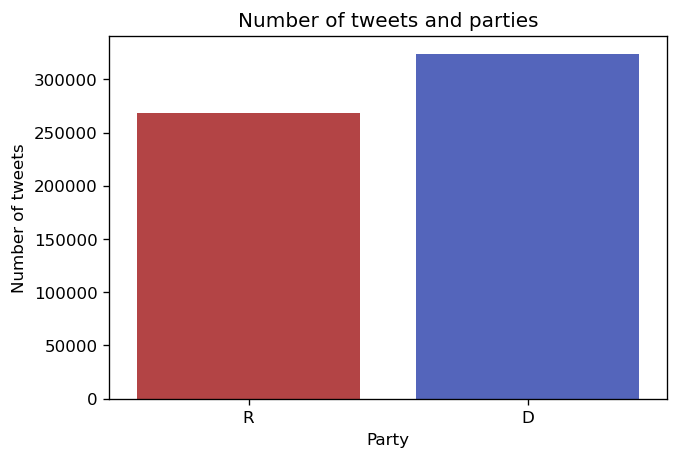

In [28]:
# Descriptive Statistics

plt.title('Number of tweets and parties')
sns.countplot('party_id', data=df_train,palette=["#c53233", "#435acc"])
plt.xlabel('Party')
plt.ylabel('Number of tweets');



In [29]:
df_train['party_id'].value_counts()

D    324202
R    268601
Name: party_id, dtype: int64

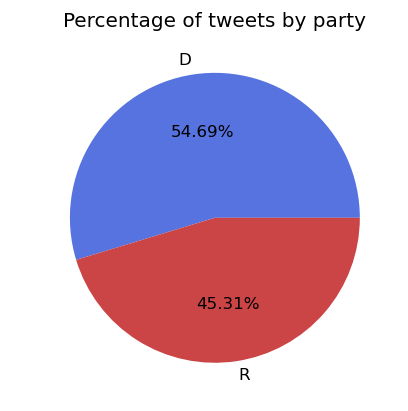

In [30]:
df_train['party_id'].value_counts().plot.pie(label= " ",autopct='%1.2f%%', 
                                             colors=["#5673e0", "#cb4446"])
plt.title('Percentage of tweets by party');

C:\Users\ezgim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


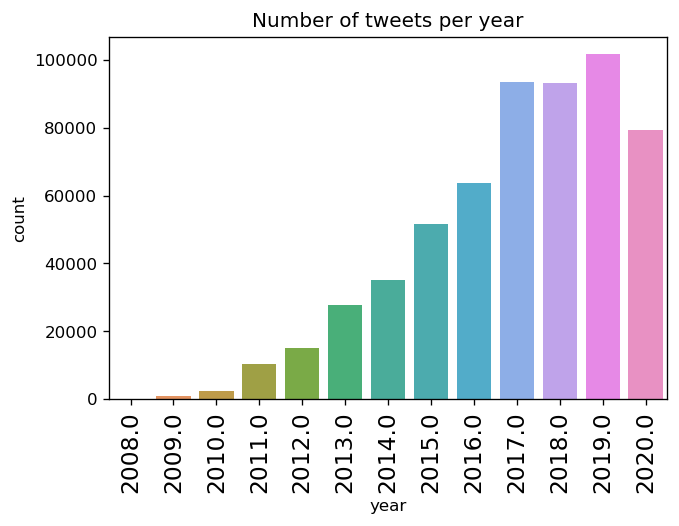

In [31]:
sns.countplot('year', data=df_train)
plt.title('Number of tweets per year')
plt.xticks(fontsize=14, rotation=90);


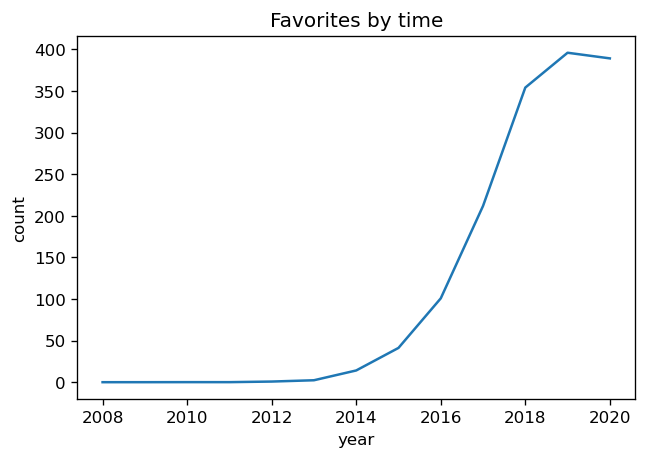

In [19]:
plt.ylabel('count')
sns.lineplot(x = "year", y = "favorite_count",
             data = df_train, ci=None).set(title='Favorites by time');

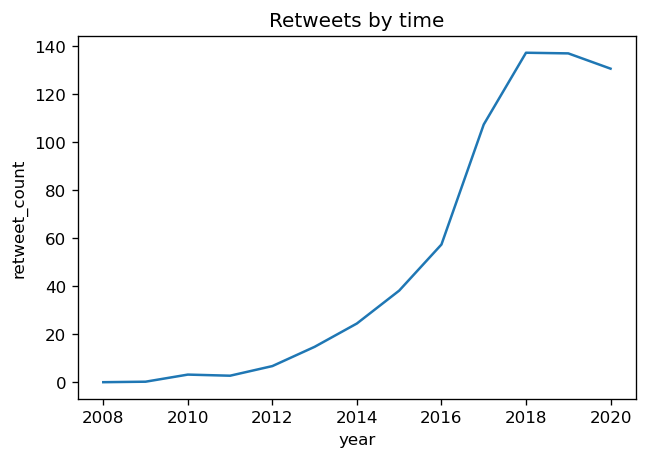

In [20]:
sns.lineplot(x = "year", y = "retweet_count",
             data = df_train,ci=None).set(title='Retweets by time');

In [21]:
# Length of tweet
words=pd.Series(df_train["full_text"])
words.str.len()
df_train['tweet_length']=words.str.len()

In [22]:

words2=pd.Series(df_train["hashtags"])
words2.str.len()
df_train['hashtag_length']=words2.str.len()

In [23]:
df_train

,favorite_count,full_text,hashtags,retweet_count,year,party_id,party_class,tweet_length,hashtag_length
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R,1,154,4
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R,1,317,11
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R,1,140,4
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R,1,130,20
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D,0,316,22
...,...,...,...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,R,1,96,26
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,R,1,101,37
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,D,0,284,19
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,R,1,138,37


In [34]:
df_train[['favorite_count','retweet_count','year','tweet_length','hashtag_length']].describe().round(2)

,favorite_count,retweet_count,year,tweet_length,hashtag_length
count,592803.00,592803.00,574091.00,592803.00,592803.00
mean,241.34,96.38,2016.99,184.64,14.51
std,2641.05,1022.11,2.34,74.92,10.15
min,0.00,0.00,2008.00,7.00,1.00
25%,2.00,2.00,2016.00,134.00,8.00
50%,10.00,5.00,2017.00,154.00,12.00
75%,35.00,16.00,2019.00,251.00,19.00
max,427420.00,213303.00,2020.00,3763.00,233.00


In [35]:
df_train[['favorite_count','retweet_count','year','tweet_length','hashtag_length','party_class']].describe().round(2)

,favorite_count,retweet_count,year,tweet_length,hashtag_length,party_class
count,592803.00,592803.00,574091.00,592803.00,592803.00,592803.00
mean,241.34,96.38,2016.99,184.64,14.51,0.45
std,2641.05,1022.11,2.34,74.92,10.15,0.50
min,0.00,0.00,2008.00,7.00,1.00,0.00
25%,2.00,2.00,2016.00,134.00,8.00,0.00
50%,10.00,5.00,2017.00,154.00,12.00,0.00
75%,35.00,16.00,2019.00,251.00,19.00,1.00
max,427420.00,213303.00,2020.00,3763.00,233.00,1.00


In [88]:
df_train.describe(include="object")

,full_text,hashtags,party_id
count,574091,574091,574091
unique,569649,185246,2
top,"b""@openletterbot I agree this cruel &amp; inhu...",COVID19,D
freq,58,8812,312116


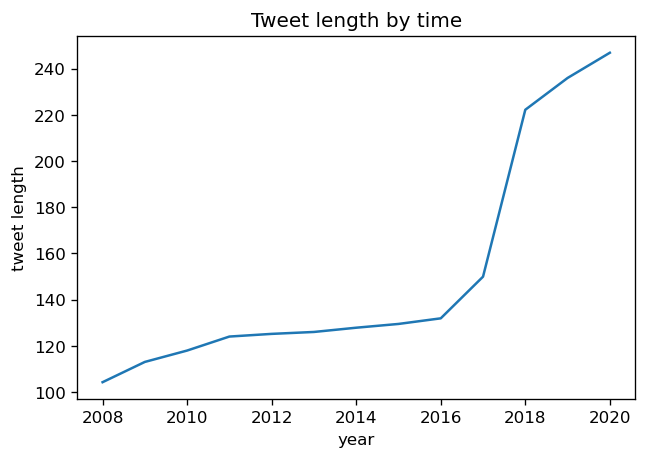

In [95]:
plt.ylabel('tweet length')
sns.lineplot(x = "year", y = "tweet_length",
             data = df_train, ci=None).set(title='Tweet length by time');

C:\Users\ezgim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


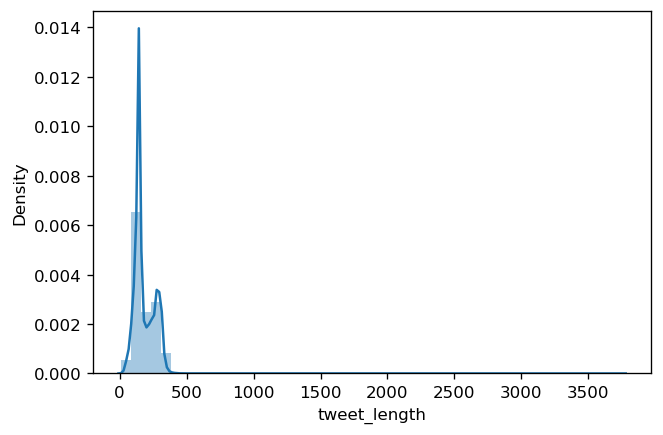

In [90]:
sns.distplot(df_train["tweet_length"]);

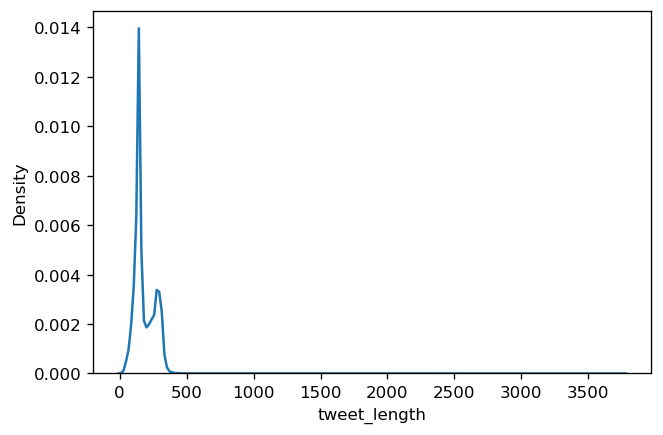

In [91]:
sns.kdeplot(df_train["tweet_length"]);

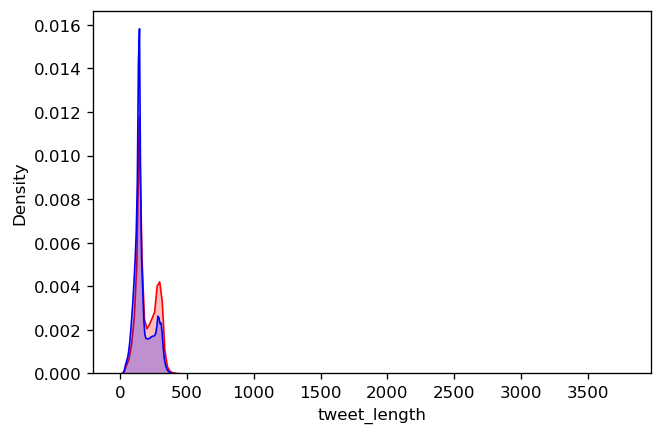

In [93]:
# Tweet length by Democratcs and Republicans

sns.kdeplot(df_train[df_train["party_id"]=="D"]["tweet_length"],shade=True,color='red')
sns.kdeplot(df_train[df_train["party_id"]=="R"]["tweet_length"],shade=True,color='blue');

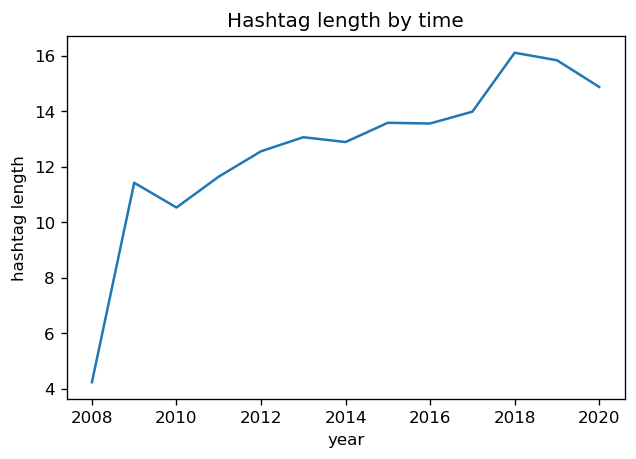

In [96]:
plt.ylabel('hashtag length')
sns.lineplot(x = "year", y = "hashtag_length",
             data = df_train, ci=None).set(title='Hashtag length by time');

C:\Users\gokha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


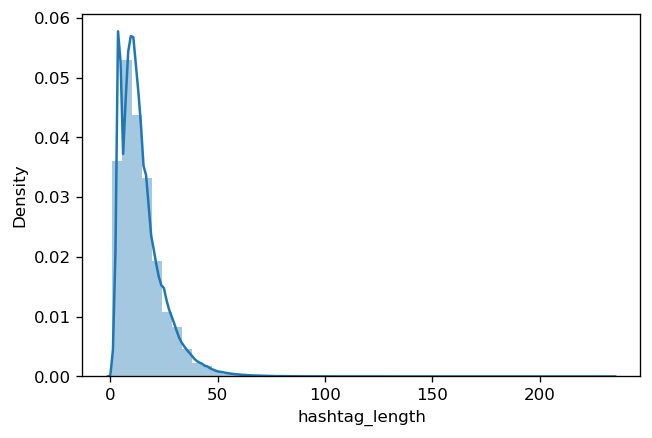

In [255]:
sns.distplot(df_train["hashtag_length"]);

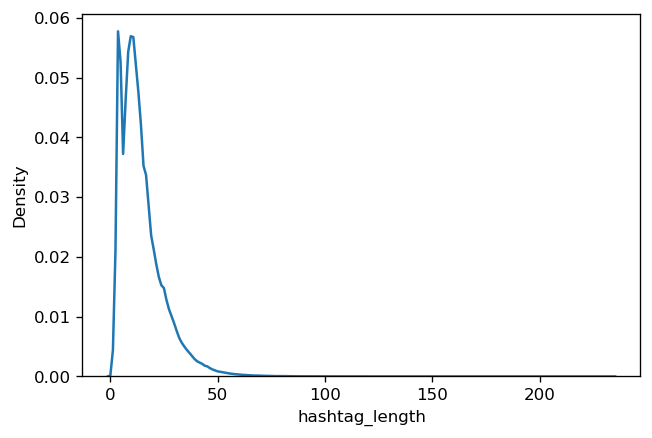

In [257]:
sns.kdeplot(df_train["hashtag_length"]);

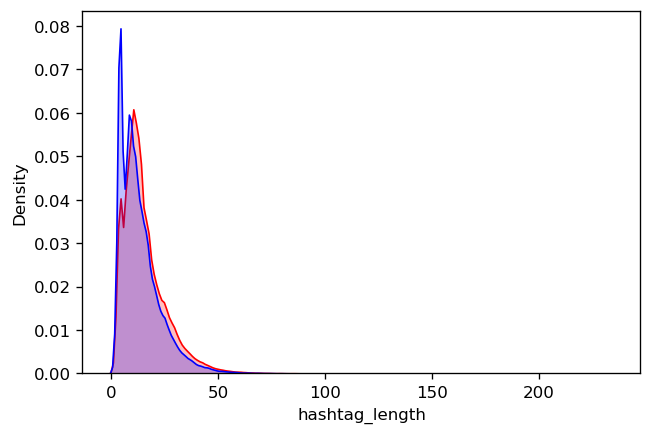

In [97]:
# Tweet length by Democratcs and Republicans

sns.kdeplot(df_train[df_train["party_id"]=="D"]["hashtag_length"],shade=True,color='red')
sns.kdeplot(df_train[df_train["party_id"]=="R"]["hashtag_length"],shade=True,color='blue');


In [260]:
df_train.dtypes

favorite_count     int64
full_text         object
hashtags          object
retweet_count      int64
year               int32
party_id          object
tweet_length       int64
hashtag_length     int64
dtype: object

In [261]:
# Wordcloud
hashtags=df_train['hashtags']
hashtags=str(hashtags)
hashtags

'0                                          KUSI\n1                                   Coronavirus\n2                                          MO03\n3                          TeamUSA WorldJuniors\n4                        ImmigrantHeritageMonth\n                          ...                  \n592798               publicservice publicsafety\n592799    StormyDaniels MichaelWolfe JamesComey\n592800                      CultureOfCorruption\n592801    app copolitics CAC16 HouseOfCode co06\n592802                                MuslimBan\nName: hashtags, Length: 574091, dtype: object'

In [100]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["dtype", "object", "hashtags", "length","Name"])

text = hashtags

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [279]:
# Hashtag word cloud by Democrats

hashtags_democrat=df_train[df_train["party_id"]=="D"]["hashtags"]
hashtags_democrat=str(hashtags_democrat)
hashtags_democrat




'4              ImmigrantHeritageMonth\n5         sustainability ActOnClimate\n9                        TakeTheCrown\n10                  KavanaughHearings\n13                          FEMA ma09\n                     ...             \n592795                           PA06\n592796                  YuccaMountain\n592797                     NoFirstUse\n592800            CultureOfCorruption\n592802                      MuslimBan\nName: hashtags, Length: 312116, dtype: object'

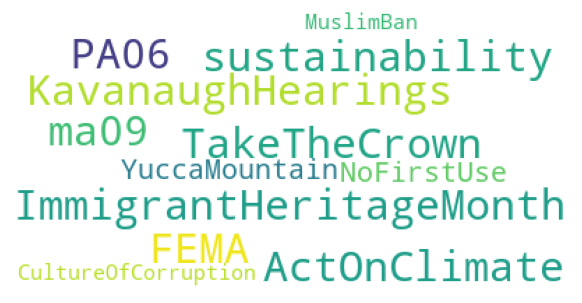

In [280]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(hashtags_democrat)
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [283]:
# Hashtag word cloud by Republicans

hashtags_republican=df_train[df_train["party_id"]=="R"]["hashtags"]
hashtags_republican=str(hashtags_republican)
hashtags_republican


'0                                          KUSI\n1                                   Coronavirus\n2                                          MO03\n3                          TeamUSA WorldJuniors\n6                                           MO7\n                          ...                  \n592788                   NewHampshire Obamacare\n592791                              16floodtour\n592798               publicservice publicsafety\n592799    StormyDaniels MichaelWolfe JamesComey\n592801    app copolitics CAC16 HouseOfCode co06\nName: hashtags, Length: 261975, dtype: object'

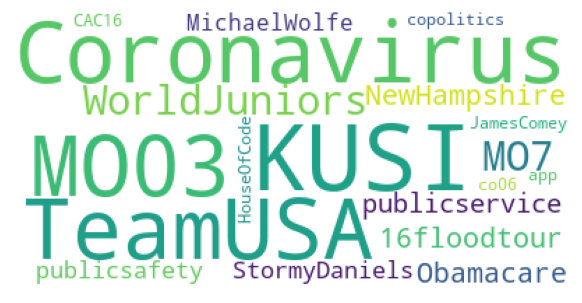

In [284]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(hashtags_republican)
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\ezgim\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ezgim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


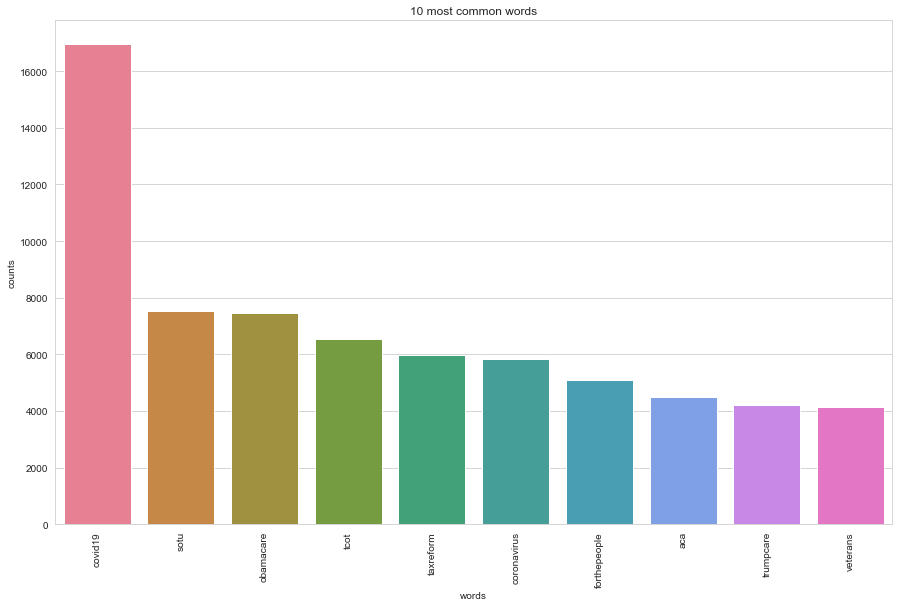

In [36]:
# Latent Dirichlet Allocation (LDA) analysis of hashtags columns
lda_copy = df_train.copy(deep=True)
lda_copy.head()
# Removing punctiation and lower-casing text field without changing original dataframe.
import re


lda_copy=df_train["hashtags"]
lda_copy = lda_copy.map(lambda x: re.sub('[,.!?]|<br \/>\+|<br \/>', '', x))
lda_copy = lda_copy.map(lambda x: x.lower())
lda_copy.head()

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True) [0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=2, rc= {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(lda_copy)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)